# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

### Imports

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

## Step 1: Read in Data

In [54]:
df = pd.read_csv('kc_house_data_train_3.csv', index_col = 0)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold,id
0,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,Oct,2591820310
1,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,Aug,7974200820
2,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014,Aug,7701450110
3,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015,Mar,9522300010
4,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014,Jul,9510861140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,5.0,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,2015,Mar,627300195
17286,440000.0,2.0,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,2014,May,8819900270
17287,310000.0,3.0,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,2014,May,3816300095
17288,427500.0,3.0,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,2014,Dec,122069107


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [17]:
df.shape

(17290, 22)

In [22]:
[print(df[x].value_counts()) for x in df.columns]

350000.0     138
450000.0     136
550000.0     135
400000.0     123
500000.0     119
            ... 
418900.0       1
1544500.0      1
863500.0       1
234975.0       1
311300.0       1
Name: price, Length: 3534, dtype: int64
3.00000     7865
4.00000     5489
2.00000     2204
5.00000     1283
6.00000      229
1.00000      160
7.00000       30
3.37033       12
8.00000       10
9.00000        5
10.00000       3
Name: bedrooms, dtype: int64
2.500000    4322
1.000000    3100
1.750000    2431
2.250000    1666
2.000000    1549
1.500000    1168
2.750000     896
3.000000     592
3.500000     591
3.250000     455
3.750000     135
4.000000     107
4.500000      76
4.250000      64
0.750000      52
5.000000      17
4.750000      16
5.250000      11
2.111943       8
5.500000       7
6.000000       6
1.250000       6
0.500000       3
5.750000       3
8.000000       2
6.250000       2
6.750000       2
6.500000       1
7.750000       1
7.500000       1
Name: bathrooms, dtype: int64
1660    105
1800 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

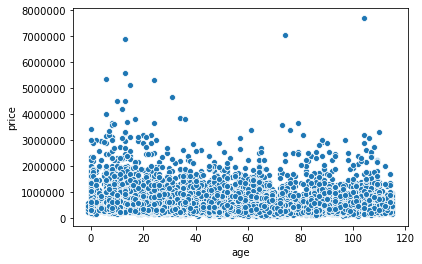

In [31]:
fig, axes = plt.subplots()

sns.scatterplot(data=df, x=df['age'], y='price')

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [28]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold,id,age
0,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,Oct,2591820310,28
1,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,Aug,7974200820,37
2,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014,Aug,7701450110,17
3,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015,Mar,9522300010,25
4,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014,Jul,9510861140,10


In [102]:
df['age'] = df['yr_sold'] - df['yr_built']

In [123]:
features = ['bathrooms', 'sqft_living', 'sqft_living15', 'sqft_above', 'sqft_basement', 'grade', 'zipcode', 'sqft_basement', 'age', 'yr_built', 'waterfront']

In [125]:
df_features = df[features]

In [47]:
target = df['price']

In [126]:
df_features

,bathrooms,sqft_living,sqft_living15,sqft_above,sqft_basement,grade,zipcode,sqft_basement,age,yr_built,waterfront
0,2.25,2070,2390,2070,0,8,98058,0,28,1986,0
1,3.00,2900,2370,1830,1070,8,98115,1070,37,1977,0
2,2.50,3770,3710,3770,0,11,98006,0,17,1997,0
3,3.50,4560,4050,4560,0,12,98034,0,25,1990,0
4,2.50,2550,2250,2550,0,9,98052,0,10,2004,0
...,...,...,...,...,...,...,...,...,...,...,...
17285,2.50,3240,2730,2020,1220,8,98008,1220,57,1958,0
17286,1.75,1300,1350,1300,0,7,98105,0,66,1948,0
17287,1.00,1050,1760,1050,0,7,98028,0,61,1953,0
17288,1.50,1900,2080,1300,600,7,98038,600,43,1971,0


In [36]:
df_features.isnull().sum()

bathrooms        0
sqft_living      0
sqft_living15    0
sqft_above       0
sqft_basement    0
grade            0
sqft_basement    0
age              0
dtype: int64

In [37]:
df_features.dtypes

bathrooms        float64
sqft_living        int64
sqft_living15      int64
sqft_above         int64
sqft_basement      int64
grade              int64
sqft_basement      int64
age                int64
dtype: object

In [104]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(df_features, target)

#access output
print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(df_features, target))

6891857.648762577
[ 4.57541469e+04  8.85092247e+01  3.22539456e+01  5.32783313e+01
  3.52308934e+01  1.37218692e+05  3.52308934e+01 -3.98945678e+03]
R^2:  0.6065371465319658


### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [101]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold,id
0,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,Oct,2591820310
1,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,Aug,7974200820
2,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014,Aug,7701450110
3,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015,Mar,9522300010
4,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014,Jul,9510861140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,5.0,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,2015,Mar,627300195
17286,440000.0,2.0,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,2014,May,8819900270
17287,310000.0,3.0,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,2014,May,3816300095
17288,427500.0,3.0,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,2014,Dec,122069107


In [94]:
df[df['mnth_sold'] == 'Jan']

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold,id,newly_ren
12,175000.0,2.0,1.00,1410,7000,1.0,0,0,3,7,1410,0,1968,0,98055,47.4908,-122.223,1540,6000,2015,Jan,4202400078,2015
35,984000.0,4.0,2.25,2390,12292,1.0,0,0,5,9,2390,0,1962,0,98040,47.5528,-122.221,2870,12337,2015,Jan,6672900220,2015
60,400000.0,4.0,3.00,2320,13068,2.0,0,2,3,8,2320,0,1998,0,98198,47.3497,-122.317,2220,25265,2015,Jan,3222049120,2015
65,156000.0,2.0,1.00,920,5889,1.0,0,0,4,6,920,0,1950,0,98002,47.3012,-122.218,1210,6180,2015,Jan,7116500705,2015
103,270000.0,4.0,2.00,1830,5220,1.5,0,0,3,7,1830,0,1951,0,98118,47.5331,-122.278,1760,5757,2015,Jan,3634100030,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17182,359000.0,4.0,2.25,2710,22860,1.0,0,0,4,7,1850,860,1962,0,98001,47.3207,-122.266,1700,22860,2015,Jan,302000545,2015
17203,264500.0,3.0,1.75,1650,16200,1.0,0,0,3,7,1650,0,1976,0,98031,47.3926,-122.168,1650,8680,2015,Jan,5469700060,2015
17224,2050000.0,4.0,3.25,3580,19989,1.5,1,4,4,7,3480,100,1915,1965,98125,47.7087,-122.276,2410,6389,2015,Jan,7352200450,50
17271,480000.0,2.0,1.00,710,4800,1.0,0,0,2,6,710,0,1950,0,98112,47.6212,-122.298,1480,1721,2015,Jan,9828701745,2015


### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [121]:
df[df['yr_renovated'] == 2014]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold,id,age
663,1280000.0,4.0,3.00,3260,4500,2.0,0,0,3,9,2300,960,1930,2014,98109,47.6314,-122.353,2410,4995,2014,Sep,811000055,84
736,332000.0,3.0,2.00,1510,7884,1.0,0,0,3,6,1510,0,1942,2014,98166,47.4683,-122.348,1050,7620,2014,Jun,1899400365,72
1289,849000.0,5.0,3.25,2450,6534,2.0,0,0,3,8,1770,680,1951,2014,98115,47.6880,-122.281,1620,6534,2014,Dec,446000190,63
1463,257000.0,3.0,1.75,1397,18000,1.0,0,0,3,7,1397,0,1965,2014,98092,47.3388,-122.166,1950,31294,2014,Nov,421059018,49
1472,324950.0,4.0,1.75,2320,9240,1.0,0,0,3,7,1160,1160,1959,2014,98178,47.4909,-122.257,2130,7320,2014,Aug,6002400030,55
1791,340000.0,3.0,2.00,1460,5715,1.0,0,0,3,7,1460,0,1957,2014,98118,47.5400,-122.276,1400,5715,2014,Jul,3812400789,57
2083,760000.0,3.0,2.00,1780,1750,1.0,0,2,3,8,1400,380,1927,2014,98103,47.6797,-122.357,1780,3750,2014,Dec,2877104196,87
2610,1100000.0,5.0,2.25,4320,7620,2.0,0,0,3,7,2880,1440,1973,2014,98115,47.6824,-122.287,1880,7620,2014,Nov,5430300120,41
2698,445000.0,3.0,1.75,1360,4998,1.0,0,0,3,8,1360,0,1968,2014,98108,47.5470,-122.302,1350,4998,2015,Apr,3942900115,47
2717,199990.0,3.0,1.00,840,5200,1.0,0,0,3,6,840,0,1969,2014,98042,47.3685,-122.077,870,5200,2015,Jan,8651431100,46


In [117]:
df['yr_built'].describe()

count    17290.000000
mean      1970.792019
std         29.343516
min       1900.000000
25%       1951.000000
50%       1974.000000
75%       1996.000000
max       2015.000000
Name: yr_built, dtype: float64

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [127]:
df_features

,bathrooms,sqft_living,sqft_living15,sqft_above,sqft_basement,grade,zipcode,sqft_basement,age,yr_built,waterfront
0,2.25,2070,2390,2070,0,8,98058,0,28,1986,0
1,3.00,2900,2370,1830,1070,8,98115,1070,37,1977,0
2,2.50,3770,3710,3770,0,11,98006,0,17,1997,0
3,3.50,4560,4050,4560,0,12,98034,0,25,1990,0
4,2.50,2550,2250,2550,0,9,98052,0,10,2004,0
...,...,...,...,...,...,...,...,...,...,...,...
17285,2.50,3240,2730,2020,1220,8,98008,1220,57,1958,0
17286,1.75,1300,1350,1300,0,7,98105,0,66,1948,0
17287,1.00,1050,1760,1050,0,7,98028,0,61,1953,0
17288,1.50,1900,2080,1300,600,7,98038,600,43,1971,0


In [132]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2

,bathrooms,sqft_living,sqft_living15,sqft_above,sqft_basement,grade,zipcode,sqft_basement,age,yr_built,waterfront,bathrooms^2,bathrooms sqft_living,bathrooms sqft_living15,bathrooms sqft_above,bathrooms sqft_basement,bathrooms grade,bathrooms zipcode,bathrooms sqft_basement,bathrooms age,bathrooms yr_built,bathrooms waterfront,sqft_living^2,sqft_living sqft_living15,sqft_living sqft_above,sqft_living sqft_basement,sqft_living grade,sqft_living zipcode,sqft_living sqft_basement,sqft_living age,sqft_living yr_built,sqft_living waterfront,sqft_living15^2,sqft_living15 sqft_above,sqft_living15 sqft_basement,sqft_living15 grade,sqft_living15 zipcode,sqft_living15 sqft_basement,sqft_living15 age,sqft_living15 yr_built,sqft_living15 waterfront,sqft_above^2,sqft_above sqft_basement,sqft_above grade,sqft_above zipcode,sqft_above sqft_basement,sqft_above age,sqft_above yr_built,sqft_above waterfront,sqft_basement^2,sqft_basement grade,sqft_basement zipcode,sqft_basement sqft_basement,sqft_basement age,sqft_basement yr_built,sqft_basement waterfront,grade^2,grade zipcode,grade sqft_basement,grade age,grade yr_built,grade waterfront,zipcode^2,zipcode sqft_basement,zipcode age,zipcode yr_built,zipcode waterfront,sqft_basement^2,sqft_basement age,sqft_basement yr_built,sqft_basement waterfront,age^2,age yr_built,age waterfront,yr_built^2,yr_built waterfront,waterfront^2
0,2.25,2070.0,2390.0,2070.0,0.0,8.0,98058.0,0.0,28.0,1986.0,0.0,5.0625,4657.5,5377.5,4657.5,0.0,18.00,220630.50,0.0,63.0,4468.5,0.0,4284900.0,4947300.0,4284900.0,0.0,16560.0,202980060.0,0.0,57960.0,4111020.0,0.0,5712100.0,4947300.0,0.0,19120.0,234358620.0,0.0,66920.0,4746540.0,0.0,4284900.0,0.0,16560.0,202980060.0,0.0,57960.0,4111020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,784464.0,0.0,224.0,15888.0,0.0,9.615371e+09,0.0,2745624.0,194743188.0,0.0,0.0,0.0,0.0,0.0,784.0,55608.0,0.0,3944196.0,0.0,0.0
1,3.00,2900.0,2370.0,1830.0,1070.0,8.0,98115.0,1070.0,37.0,1977.0,0.0,9.0000,8700.0,7110.0,5490.0,3210.0,24.00,294345.00,3210.0,111.0,5931.0,0.0,8410000.0,6873000.0,5307000.0,3103000.0,23200.0,284533500.0,3103000.0,107300.0,5733300.0,0.0,5616900.0,4337100.0,2535900.0,18960.0,232532550.0,2535900.0,87690.0,4685490.0,0.0,3348900.0,1958100.0,14640.0,179550450.0,1958100.0,67710.0,3617910.0,0.0,1144900.0,8560.0,104983050.0,1144900.0,39590.0,2115390.0,0.0,64.0,784920.0,8560.0,296.0,15816.0,0.0,9.626553e+09,104983050.0,3630255.0,193973355.0,0.0,1144900.0,39590.0,2115390.0,0.0,1369.0,73149.0,0.0,3908529.0,0.0,0.0
2,2.50,3770.0,3710.0,3770.0,0.0,11.0,98006.0,0.0,17.0,1997.0,0.0,6.2500,9425.0,9275.0,9425.0,0.0,27.50,245015.00,0.0,42.5,4992.5,0.0,14212900.0,13986700.0,14212900.0,0.0,41470.0,369482620.0,0.0,64090.0,7528690.0,0.0,13764100.0,13986700.0,0.0,40810.0,363602260.0,0.0,63070.0,7408870.0,0.0,14212900.0,0.0,41470.0,369482620.0,0.0,64090.0,7528690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,1078066.0,0.0,187.0,21967.0,0.0,9.605176e+09,0.0,1666102.0,195717982.0,0.0,0.0,0.0,0.0,0.0,289.0,33949.0,0.0,3988009.0,0.0,0.0
3,3.50,4560.0,4050.0,4560.0,0.0,12.0,98034.0,0.0,25.0,1990.0,0.0,12.2500,15960.0,14175.0,15960.0,0.0,42.00,343119.00,0.0,87.5,6965.0,0.0,20793600.0,18468000.0,20793600.0,0.0,54720.0,447035040.0,0.0,114000.0,9074400.0,0.0,16402500.0,18468000.0,0.0,48600.0,397037700.0,0.0,101250.0,8059500.0,0.0,20793600.0,0.0,54720.0,447035040.0,0.0,114000.0,9074400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,1176408.0,0.0,300.0,23880.0,0.0,9.610665e+09,0.0,2450850.0,195087660.0,0.0,0.0,0.0,0.0,0.0,625.0,49750.0,0.0,3960100.0,0.0,0.0
4,2.50,2550.0,2250.0,2550.0,0.0,9.0,98052.0,0.0,10.0,2004.0,0.0,6.2500,6375.0,5625.0,6375.0,0.0,22.50,245130.00,0.0,25.0,5010.0,0.0,6502500.0,5737500.0,6502500.0,0.0,22950.0,250032600.0,0.0,25500.0,5110200.0,0.0,5062500.0,5737500.0,0.0,20250.0,220617000.0,0.0,22500.0,4509000.0,0.0,6502500.0,0.0,22950.0,250032600.0,0.0,25500.0,5110200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,882468.0,0.0,90.0,18036.0,0.0,9.614195e+09,0.0,980520.0,196496208.0,0.0,0.0,0.0,0.0,0.0,100.0,20040.0,0.0,

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=30,test_size=0.2)

### 5.2) Fit your scaler to training the data.

In [135]:
scaler = StandardScaler()

scaler.fit(X_train) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=df_features.columns) 

### 5.3) Transform the testing set with the scaler.

In [162]:
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

In [163]:
# transform the testing data
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

### 5.4) Fit the model to the training data.

In [164]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

### 5.5) Use the model to predict on the training set and the test set.

In [165]:
y_train_pred = lm.predict(X_train)


In [166]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

### 5.6) Evaluate the training and test predictions using RMSE.

In [167]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 227044.4260370634


In [168]:
#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

Testing Root Mean Squared Error: 211736.4352550575


### 5.7) Determine if your model is overfit.

In [169]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  227044 vs. Testing:  211736


## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

In [149]:
#take the natural log of the target variable
y_log = np.log(y_train)

In [150]:
#instantiate a linear regression object
lm_log = LinearRegression()

In [151]:
#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

In [155]:
log_train_pred = lm_log.predict(X_train)

#log_train_pred the predictions to get them on the same original scale 
log_y_train_pred = np.exp(log_train_pred)

log_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))


print('Training Root Mean Squared Error:' , log_train_rmse)

Training Root Mean Squared Error: 658271.5191084885


In [156]:
log_test_pred = lm_log.predict(X_test)
#exponentiate the predictions to get them on the same original scale 
log_test_pred = np.exp(log_test_pred)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))


print('Testing Root Mean Squared Error:' , log_test_rmse)

Testing Root Mean Squared Error: 210595.90961540284


In [158]:
log_y_test_pred = lm_log.predict(X_test)


#our model predcicte the log of gross, so now we must exponentiate to get the value in $
log_y_test_pred = np.exp(y_test_pred)

log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , log_test_rmse)


print('Training: ', int(log_train_rmse), "vs. Testing: ", int(log_test_rmse))

Testing Root Mean Squared Error: 210595.90961540284
Training:  658271 vs. Testing:  210595


C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [185]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=5) # select the 20 best features using their f-statistic

selector.fit(X_train, y_train)

SelectKBest(k=5, score_func=<function f_regression at 0x0000014EF221FF28>)

In [186]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train, y_train)

y_train_kbest = lm_kbest.predict(X_train)


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test)

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)




Training Root Mean Squared Error: 227044.4260370634
Testing Root Mean Squared Error: 211736.4352550575


### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/